## [DeepSpeech v0.9.3](https://deepspeech.readthedocs.io/en/v0.9.3/)
Transcribe 16kHz wav audio PCM-16
+ Play audio sample
+ Visualize audio sample
+ Transcribe audio sample

[deepspeech-tflite](https://pypi.org/project/deepspeech-tflite/)

### Play audio sample

In [1]:
import IPython

audio_path = "model/sample.wav"

IPython.display.Audio(audio_path)

### Visualize audio sample

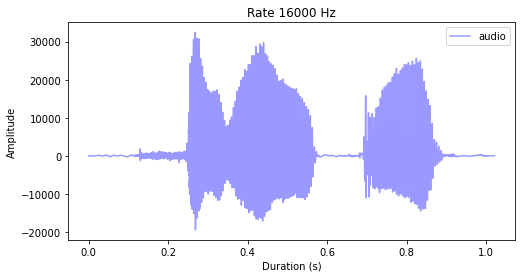

In [12]:
import pydub
import numpy as np
import matplotlib.pyplot as plt

audio_path = "model/sample.wav"
audio_segment = pydub.AudioSegment.from_wav(audio_path)
audio_segment = audio_segment.set_frame_rate(16000)

# audio_segment.export("/root/Desktop/test.wav", format="wav")

rate = audio_segment.frame_rate 
samples = audio_segment.get_array_of_samples()
data = np.array(samples).tolist()
duration = len(data) / rate    
time = np.arange(0, duration, 1. / rate)
time, data = time[: len(data)], data[: len(time)]

plt.figure(figsize=(8, 4))
plt.plot(time, data, color='blue', alpha=0.4, label='audio')
plt.title(f"Rate {rate} Hz"); 
plt.xlabel('Duration (s)')
plt.ylabel('Amplitude')
plt.legend() 
plt.show()

### Transcribe audio sample

In [20]:
import deepspeech


class DeepSpeech:
    def __init__(self, model, scorer, alpha=0.931289039105002, beta=1.1834137581510284):
        self.model = deepspeech.Model(model)
        self.model.enableExternalScorer(scorer)
        self.model.setScorerAlphaBeta(alpha, beta)
   
    def transcribe(self, audio):
        audio_segment = pydub.AudioSegment.from_wav(audio)
        audio_segment = audio_segment.set_frame_rate(16000)
        assert audio_segment.frame_rate == 16000 
        samples = audio_segment.get_array_of_samples()
        return self.model.stt(samples)

    
model_path = 'model/output_graph.tflite'
scorer_path = 'model/output_graph.scorer'
audio_path = "model/sample.wav"

model = DeepSpeech(model_path, scorer_path)
model.transcribe(audio_path)

TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85


'hello how in the'